In [1]:
import numpy as np
from scipy import linalg
from scipy.linalg import lstsq
from scipy import stats
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')



In [2]:
def get_least_squares_fit(data, basis_matrix, weights=None):
    c_mat = basis_matrix
    d_mat = np.array(data)
    if weights is not None:
        w = np.array(weights)
        c_mat = w[:, None] * c_mat
        d_mat = w * d_mat
    rho_fit_mat, _, _, _ = lstsq(c_mat.T, d_mat)
    print(rho_fit_mat)
    return rho_fit_mat

In [9]:
data = [5,5,5,5,5,10, 12, 6, 2, 8, 9]
u_matrix = np.arange(0, len(data))
basis_matrix = np.array([u_matrix, np.ones(len(data))])
rho_fit_val = get_least_squares_fit(data,basis_matrix)

[0.29090909 5.09090909]


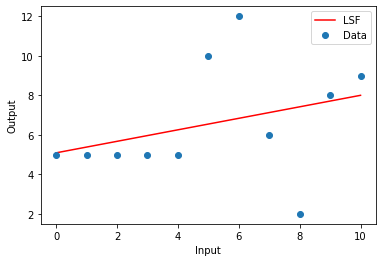

In [11]:
distances = np.arange(0, len(data), 1)
slope, intercept, r_value, p_value, std_err = stats.linregress(distances,data)
line = slope*distances+intercept
plt.plot(distances, line, 'r', label='LSF'.format(slope,intercept))
plt.plot(distances, data, label="Data",linestyle="",marker="o")

plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()